In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Injestion

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Data Profiling

In [5]:
### Here names of columns are missing in the dataset, so we need to add them

In [6]:
columns = ['age','work-class','unknown','education','num','maritial-status','profession','relation','race','sex','capital-gain','capital-loss','work-hrs','country','income']

In [7]:
df = pd.read_csv('adult.csv',names=columns,header=None,skiprows=1)

In [8]:
df.head()

,age,work-class,unknown,education,num,maritial-status,profession,relation,race,sex,capital-gain,capital-loss,work-hrs,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
#create a copy of orignal data
df_copy = df.copy()

In [10]:
#dropping unknon values as unable to find the reference to it
df_copy = df_copy.drop('unknown', axis=1)

In [11]:
df_copy.head()

,age,work-class,education,num,maritial-status,profession,relation,race,sex,capital-gain,capital-loss,work-hrs,country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   work-class       32560 non-null  object
 2   education        32560 non-null  object
 3   num              32560 non-null  int64 
 4   maritial-status  32560 non-null  object
 5   profession       32560 non-null  object
 6   relation         32560 non-null  object
 7   race             32560 non-null  object
 8   sex              32560 non-null  object
 9   capital-gain     32560 non-null  int64 
 10  capital-loss     32560 non-null  int64 
 11  work-hrs         32560 non-null  int64 
 12  country          32560 non-null  object
 13  income           32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [13]:
df_copy.shape

(32560, 14)

In [14]:
df_copy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32560.0,NaN,NaN,NaN,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
work-class,32560,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32560,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num,32560.0,NaN,NaN,NaN,10.08059,2.572709,1.0,9.0,10.0,12.0,16.0
maritial-status,32560,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profession,32560,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relation,32560,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32560,5,White,27815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32560,2,Male,21789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,32560.0,NaN,NaN,NaN,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0


# Data Cleaning

### Check for missing values

In [15]:
#Check for missing values
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   work-class       32560 non-null  object
 2   education        32560 non-null  object
 3   num              32560 non-null  int64 
 4   maritial-status  32560 non-null  object
 5   profession       32560 non-null  object
 6   relation         32560 non-null  object
 7   race             32560 non-null  object
 8   sex              32560 non-null  object
 9   capital-gain     32560 non-null  int64 
 10  capital-loss     32560 non-null  int64 
 11  work-hrs         32560 non-null  int64 
 12  country          32560 non-null  object
 13  income           32560 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [16]:
categorical = [col for col in df_copy.columns if df[col].dtype == 'O']

In [17]:
numerical = [col for col in df_copy.columns if df[col].dtype != 'O']

In [18]:
for i in numerical:
    print(f"{i}: {df_copy[i].unique()}")

age: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
capital-gain: [    0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386  7298
  1409  3674  1055  3464  2050  2176  2174   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18

In [19]:
for i in categorical:
    print(f"{i}: {df_copy[i].unique()}")

work-class: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
maritial-status: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
profession: [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relation: [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' ' Female']
country: [' United-States' ' Cuba' ' Jamaica' ' India' '

In [20]:
for i in categorical:
    print(df_copy[i].value_counts(dropna=False)/df_copy.shape[0]*100,"\n")

 Private             69.705160
 Self-emp-not-inc     7.804054
 Local-gov            6.428133
 ?                    5.638821
 State-gov            3.983415
 Self-emp-inc         3.427518
 Federal-gov          2.948403
 Without-pay          0.042998
 Never-worked         0.021499
Name: work-class, dtype: float64 

 HS-grad         32.251229
 Some-college    22.392506
 Bachelors       16.443489
 Masters          5.291769
 Assoc-voc        4.244472
 11th             3.608722
 Assoc-acdm       3.277027
 10th             2.865479
 7th-8th          1.984029
 Prof-school      1.769042
 9th              1.578624
 12th             1.329853
 Doctorate        1.268428
 5th-6th          1.022727
 1st-4th          0.515971
 Preschool        0.156634
Name: education, dtype: float64 

 Married-civ-spouse       45.995086
 Never-married            32.807125
 Divorced                 13.645577
 Separated                 3.148034
 Widowed                   3.049754
 Married-spouse-absent     1.283784
 Mar

In [21]:
#here we see that there are some values with ? we need to replace them with nan

In [22]:
for i in categorical:
    df_copy[i] = df_copy[i].str.replace("?",str(np.nan))

In [23]:
for i in categorical:
    print(df_copy[i].value_counts(dropna=False)/df_copy.shape[0]*100,"\n")

 Private             69.705160
 Self-emp-not-inc     7.804054
 Local-gov            6.428133
 nan                  5.638821
 State-gov            3.983415
 Self-emp-inc         3.427518
 Federal-gov          2.948403
 Without-pay          0.042998
 Never-worked         0.021499
Name: work-class, dtype: float64 

 HS-grad         32.251229
 Some-college    22.392506
 Bachelors       16.443489
 Masters          5.291769
 Assoc-voc        4.244472
 11th             3.608722
 Assoc-acdm       3.277027
 10th             2.865479
 7th-8th          1.984029
 Prof-school      1.769042
 9th              1.578624
 12th             1.329853
 Doctorate        1.268428
 5th-6th          1.022727
 1st-4th          0.515971
 Preschool        0.156634
Name: education, dtype: float64 

 Married-civ-spouse       45.995086
 Never-married            32.807125
 Divorced                 13.645577
 Separated                 3.148034
 Widowed                   3.049754
 Married-spouse-absent     1.283784
 Mar

In [24]:
# check for missing values

In [25]:
missing = df_copy.isna().sum()/df_copy.shape[0]*100

In [26]:
missing

age                0.0
work-class         0.0
education          0.0
num                0.0
maritial-status    0.0
profession         0.0
relation           0.0
race               0.0
sex                0.0
capital-gain       0.0
capital-loss       0.0
work-hrs           0.0
country            0.0
income             0.0
dtype: float64

In [27]:
#Here we conclude that there are no missing values in dataset
#Here data cleaning is completed

# EDA

In [28]:
df_copy.sample(10)

,age,work-class,education,num,maritial-status,profession,relation,race,sex,capital-gain,capital-loss,work-hrs,country,income
13612,43,Federal-gov,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,0,0,50,United-States,<=50K
19279,49,Self-emp-not-inc,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,14084,0,30,United-States,>50K
8135,19,Private,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K
22701,36,Federal-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
8059,47,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,<=50K
30828,22,State-gov,Some-college,10,Never-married,Transport-moving,Own-child,White,Male,0,0,25,United-States,<=50K
8895,63,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,South,<=50K
24424,47,Private,Some-college,10,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
19271,26,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
1468,40,Private,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,36,United-States,>50K


In [29]:
df_copy.to_csv('clean_adult_data.csv',index=False)

In [30]:
# from autoviz.AutoViz_Class import AutoViz_Class

# AV = AutoViz_Class()

### Pandas Profiling

In [31]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_copy, title="Pandas Profiling Report", explorative=True)
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Graphical and Statistical analysis

In [32]:
df_copy.head()

,age,work-class,education,num,maritial-status,profession,relation,race,sex,capital-gain,capital-loss,work-hrs,country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Comparing education with age

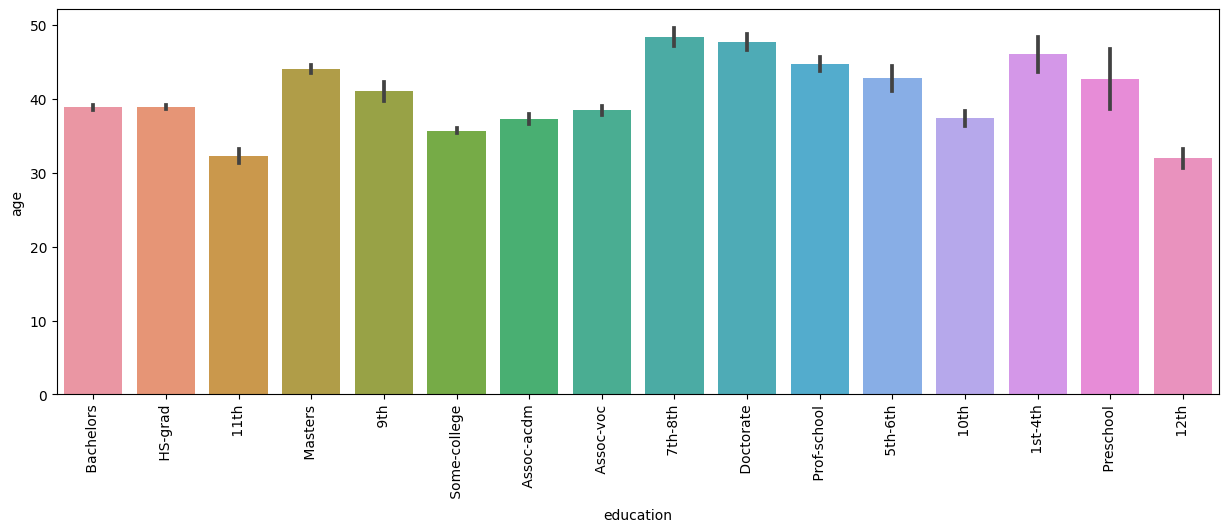

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_copy,x='education',y='age')
plt.xticks(rotation=90)
plt.show()

#### How many people lie in the income range

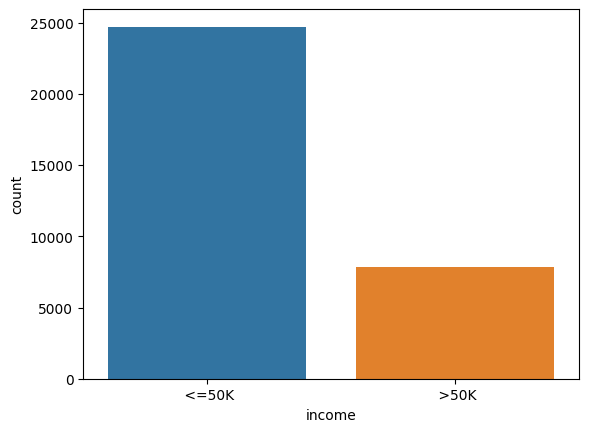

In [34]:
income=df_copy.groupby(['income']).sum().value_counts().reset_index()
sns.countplot(data=income,x=df_copy['income'])
plt.show()

#### Income category of various races

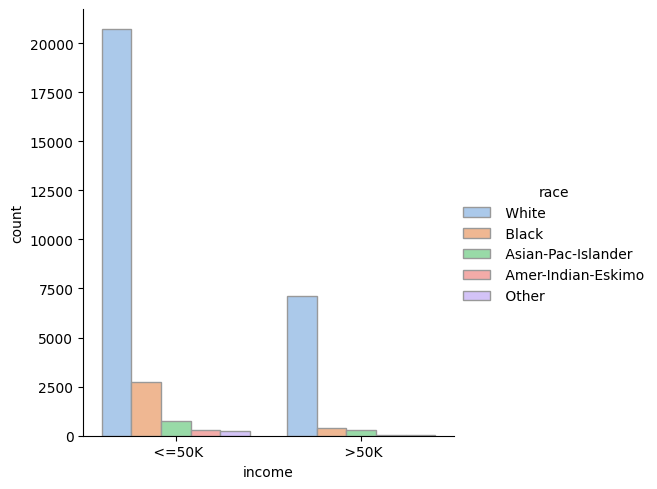

In [35]:
sns.catplot(
    data=df_copy, x="income", hue="race", kind="count",
    palette="pastel", edgecolor=".6",
)

#### Which sex category has the highest income?

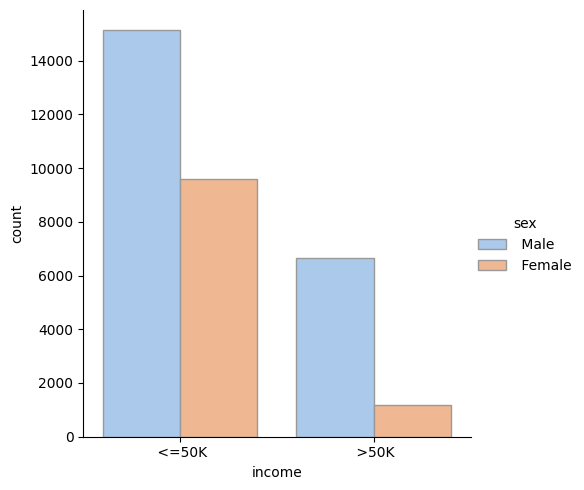

In [36]:
sns.catplot(
    data=df_copy, x="income", hue="sex", kind="count",
    palette="pastel", edgecolor=".6",
)

#### Income distribution  according to Profession

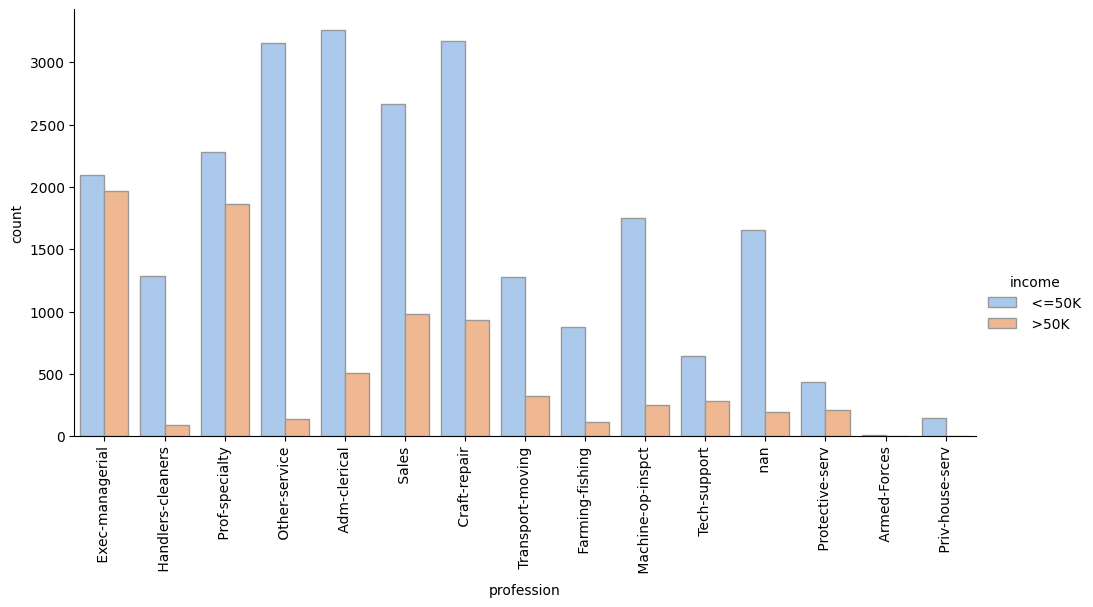

In [70]:
sns.catplot(
    data=df_copy, x="profession", hue="income", kind="count",
    palette="pastel", edgecolor=".6",aspect=2
)
plt.xticks(rotation=90)
plt.show()

#### Which race has higher work hours?

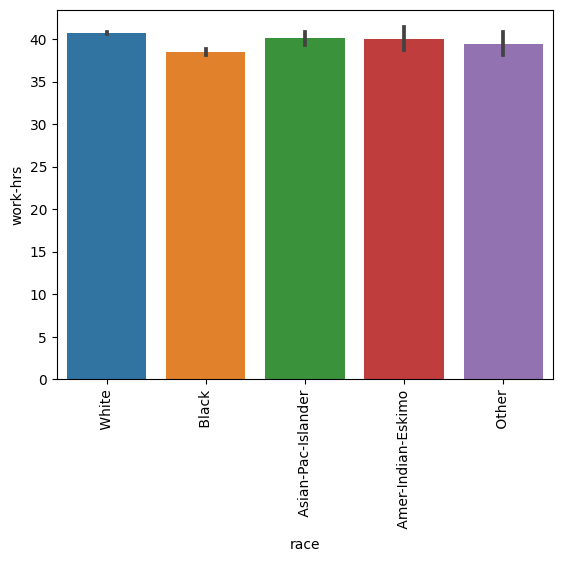

In [38]:
df_copy.groupby(['race']).agg({'work-hrs':'sum'})
sns.barplot(data=df_copy,x=df_copy['race'],y=df_copy['work-hrs'])
plt.xticks(rotation=90)
plt.show()

#### Do males work more than females per week?

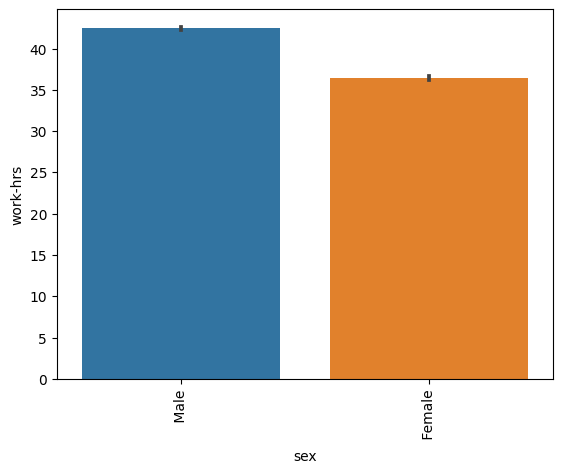

In [39]:
df_copy.groupby(['sex']).agg({'work-hrs':'sum'})
sns.barplot(data=df_copy,x=df_copy['sex'],y=df_copy['work-hrs'])
plt.xticks(rotation=90)
plt.show()

#### Does education has an impact on maritial status?

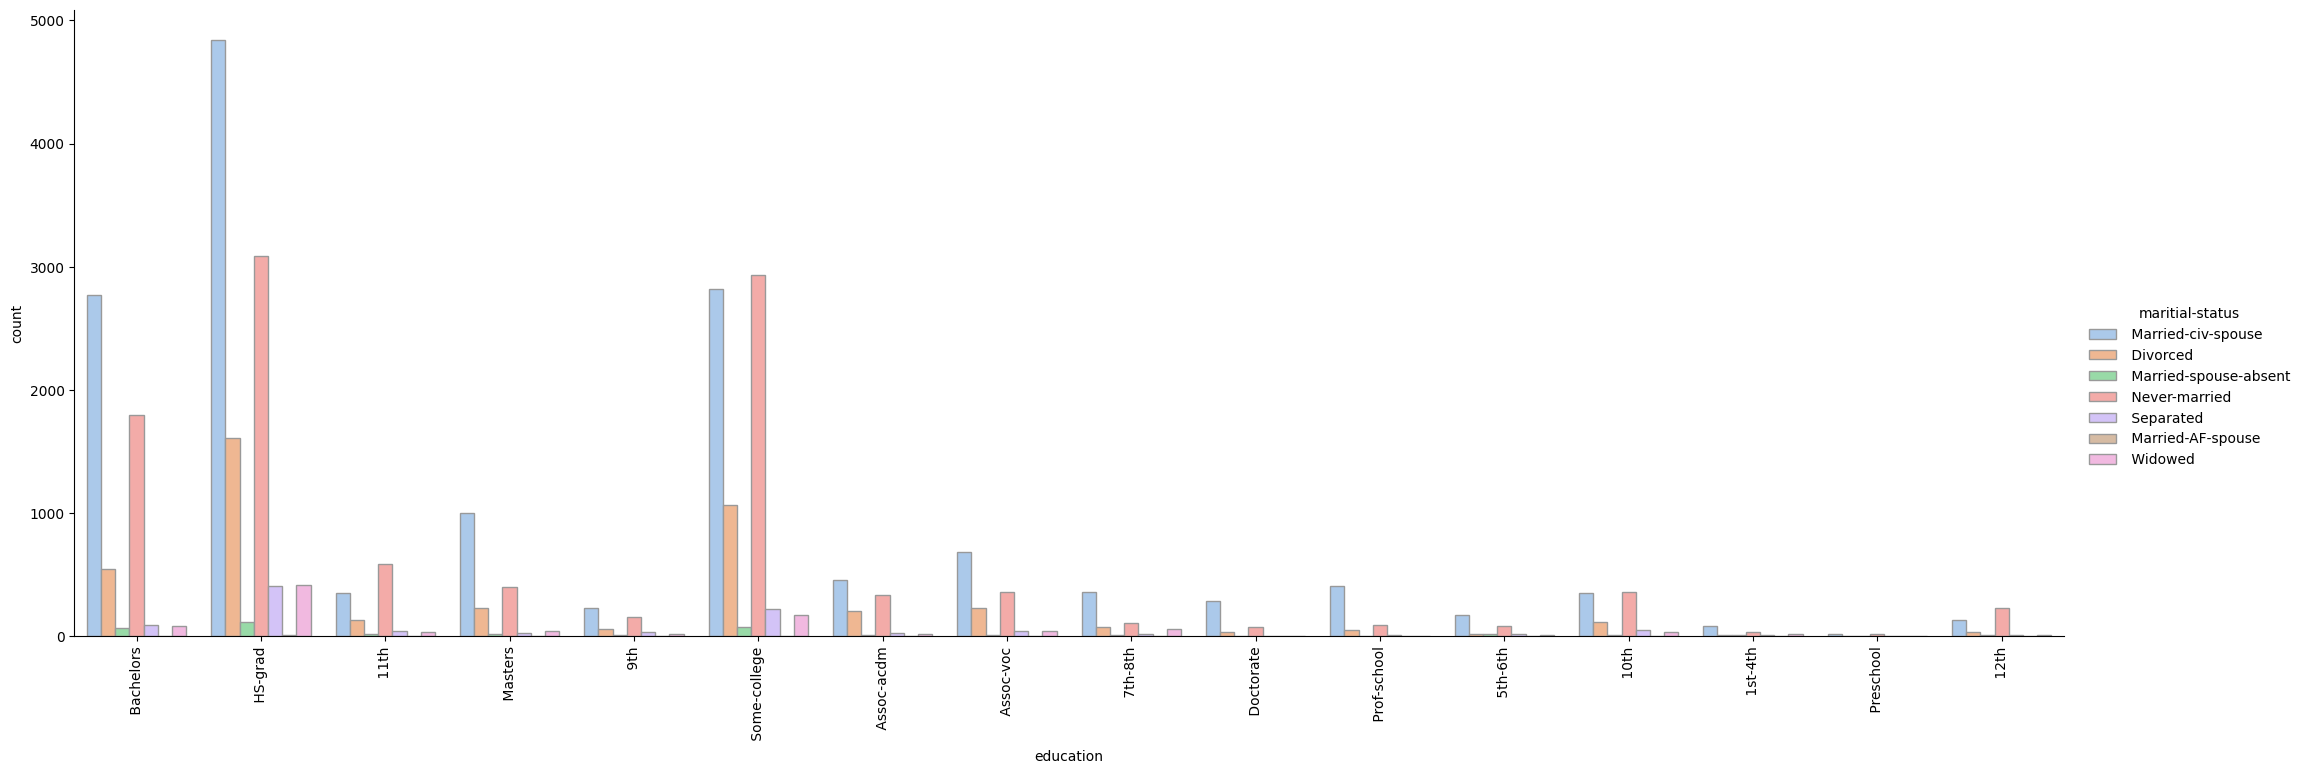

In [56]:
#plt.figure(figsize=(20,20))
sns.catplot(
    data=df_copy, x="education", hue="maritial-status", kind="count",
    palette="pastel", edgecolor=".6", height=7,aspect=3
)
plt.xticks(rotation=90)
plt.show()

#### Does income play a major factor in maritial-status?

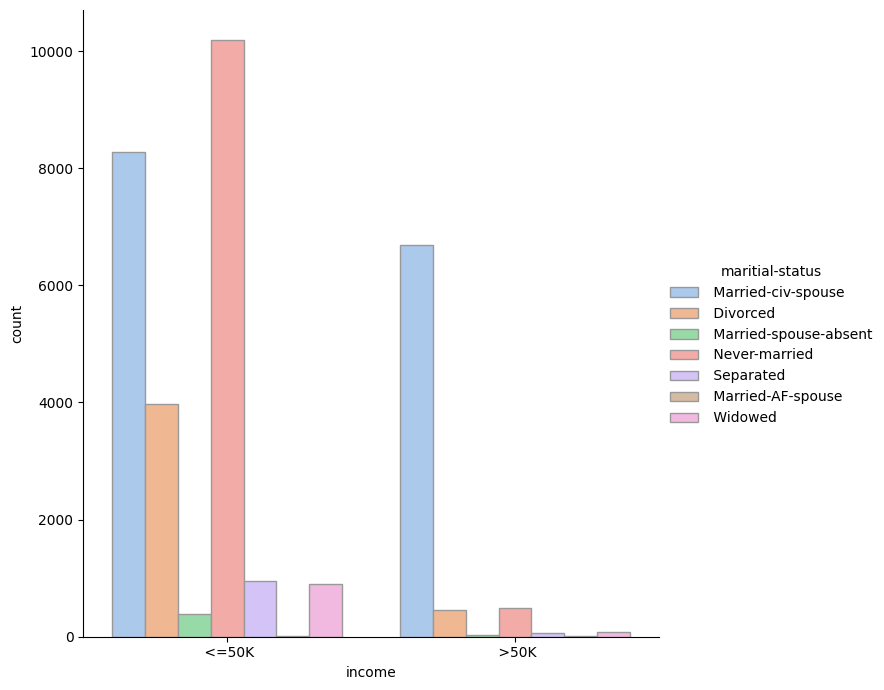

In [59]:
sns.catplot(
    data=df_copy, x="income", hue="maritial-status", kind="count",
    palette="pastel", edgecolor=".6", height=7,aspect=1
)

plt.show()

#### Income distribution in countries

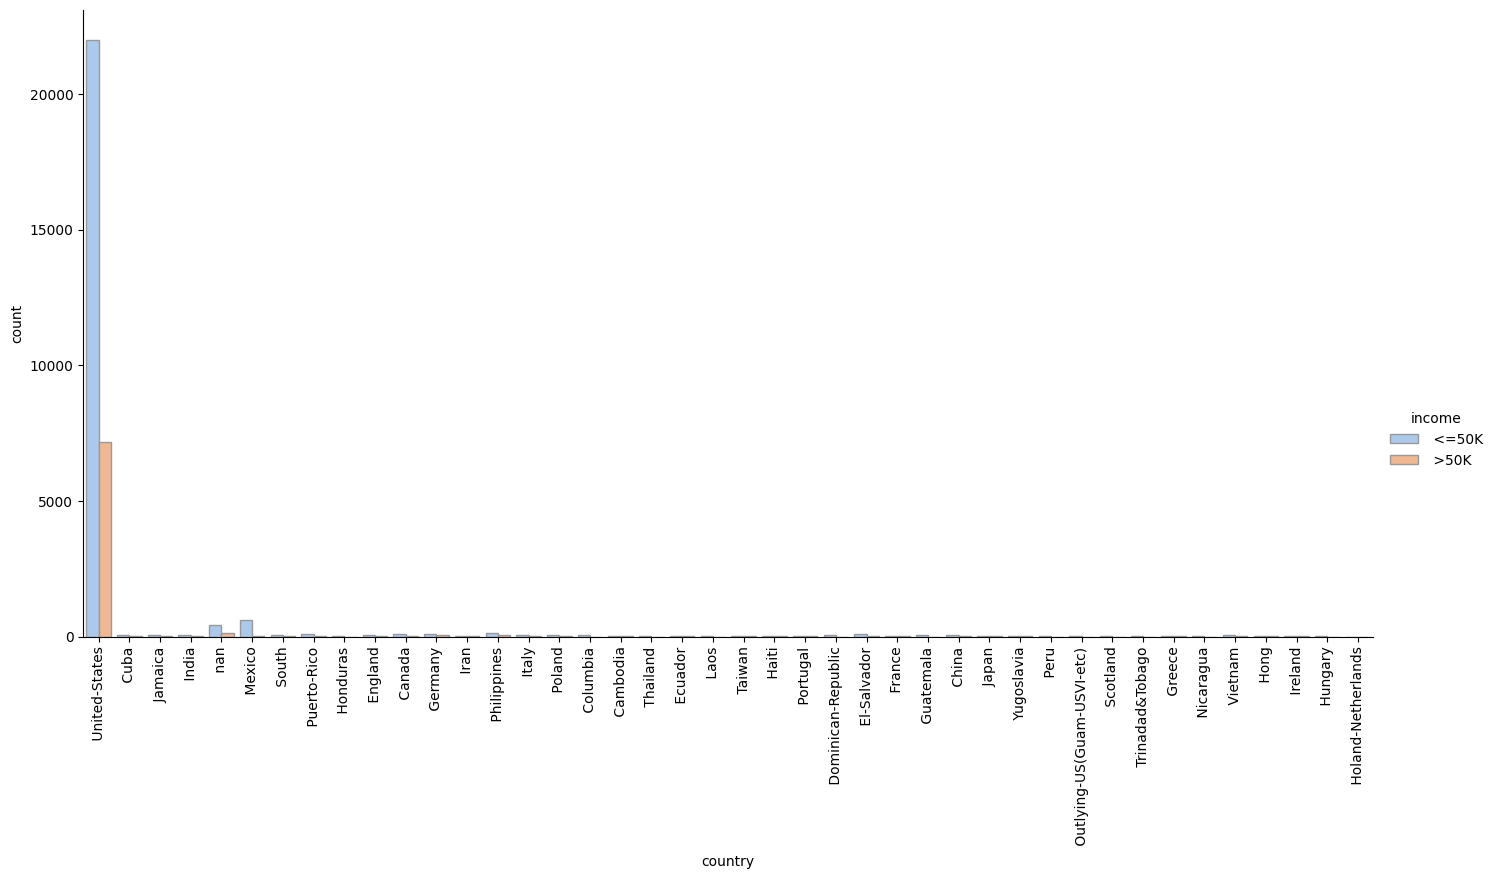

In [66]:
sns.catplot(
    data=df_copy, x="country", hue="income", kind="count",
    palette="pastel", edgecolor=".6", height=7,aspect=2
)
plt.xticks(rotation=90)
plt.show()